In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

In [2]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 , Windows용
#url = 'https://github.com/aaBadri/nlp-tf/blob/master/irish-lyrics-eof.txt'
#urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

('irish-lyrics-eof.txt', <http.client.HTTPMessage at 0x1eff2ebfbe0>)

In [7]:
# 토큰화
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
#print(tokenizer.word_index)
total_words=len(tokenizer.word_index) + 1
print(total_words)

2690


In [12]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # 원핫 인코딩

ys[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 학습
history = model.fit(xs,ys,epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 [==============================] - 8s 10ms/step - loss: 6.6558 - accuracy: 0.0715
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7836 - accuracy: 0.1111
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.9285 - accuracy: 0.1569
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.9680 - accuracy: 0.2309
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 3.0676 - accuracy: 0.3470
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.3658 - accuracy: 0.4674
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.8774 - accuracy: 0.5654
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.4967 - accuracy: 0.6425
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.2637 - accuracy: 0.6948
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.1120 - accur

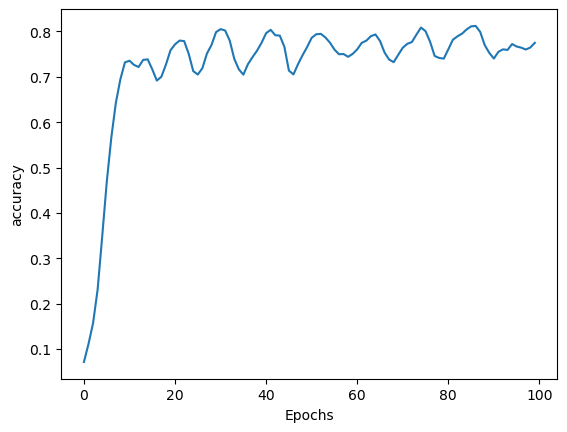

In [15]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [17]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = tf.argmax(model.predict(token_list, verbose=0),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this id from me and said the fine old canal bare your friends flood heavens sun sets gone gone gone gone away love easy gone by day by side by side by side by i our wedding day please god stop grows lies along one hurrah me heavenward o power of my power of tears still tears them fray far alive hear oer the bounding main main chains hes stationed soul wild their mantle are creeping above i might ask someone thou art heavenward winging fading omalley started me my art heavenward winging across the counter had back pray someone gone
